#20 NEWS GROUP CLASSIFICATION  

Corrado Montoro 

Luca Lazzati

In [3]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.4MB/s 
     |████████████████████████████████| 552kB 19.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=1201392df4b40ec340f7901bb8d22878af3a89f2c359a4da30dcabf4496f2bf1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=0e2d4bf2e3ca5eefe489bbb1f4e2a6da921a3eb86d72a465e2f5fe690ee2cad9
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [4]:
import os
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, preprocessing
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pyLDAvis
import pyLDAvis.sklearn


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Parsing dei file

In [ ]:
flist = [os.path.join(path, name) for path, subdirs, files in os.walk("/content/drive/My Drive/20_newsgroups") for name in files] 
text = []
diz = {}
for si in range(len(flist)):
    filein = flist[si]
    ls_filein = filein.split('/')
    target = ls_filein[5].split('\\')[0]
    ind = ls_filein[6].split('\\')[-1]
    with open(filein) as f: data = f.readlines()
    text = None
    for j in range(len(data)):
        if (data[j] == '\n'):
            text = data[j+1:]
            for k in range(len(text)):
                if ('Version:' in text[k]):
                    text = text[k+1:]
                    break;
                elif ('writes' in text[k]):
                    text = text[k+1:]
                    break;
                elif ('wrotes' in text[k]):
                    text = text[k+1:]
                    break;
                elif (text[k] == '\n' and text[k-1] =='\n'):
                    text = text[k+1:]
                    break;
            break;
    diz[int(si)] = {'text':text, 'target':target, 'idx':int(ind)}
    
df = pd.DataFrame.from_dict(diz, orient = 'index')

In [ ]:
df.to_csv("DataTextMiningAll.csv")

# RACCOLTA DEI FILE

doc: tutti i file con i vari testi

classe: target dei file

idx: indice dei vari file

In [1]:
df = pd.read_csv('/content/drive/My Drive/DataTextMiningAll.csv')  

NameError: ignored

In [2]:
df.head()

NameError: ignored

Eliminazione della colonna **Unnamed: 0**

In [6]:
df.drop(columns={"Unnamed: 0": ""},inplace=True)

Visualizzazione 

In [7]:
df.head()

,text,target,idx
0,['>In article <Apr.7.01.56.56.1993.22824@athos...,soc.religion.christian,20487
1,['I have come across what I consider to be an ...,soc.religion.christian,20488
2,"['Hi...\n', '\n', ""I'm new to this group, and ...",soc.religion.christian,20362
3,"['Therefore, whoever humbles himself like this...",soc.religion.christian,20365
4,['>In article <Mar.22.02.52.49.1993.330@athos....,soc.religion.christian,20361


# Data exploration

Esempio di news

In [8]:
print(df.text.loc[60])

['Another guess to your salvation riddle would be "saved".\n', '\n', 'Joe Fisher\n']


Controlliamo se sono presenti **na**

In [9]:
df.isnull().sum()

text      0
target    0
idx       0
dtype: int64

Lista delle classi

In [10]:
print(df.target.unique())

['soc.religion.christian' 'talk.politics.mideast' 'sci.electronics'
 'talk.politics.guns' 'talk.religion.misc' 'talk.politics.misc'
 'rec.sport.hockey' 'sci.space' 'sci.med' 'sci.crypt' 'alt.atheism'
 'comp.sys.mac.hardware' 'misc.forsale' 'rec.sport.baseball' 'rec.autos'
 'comp.sys.ibm.pc.hardware' 'rec.motorcycles' 'comp.graphics'
 'comp.os.ms-windows.misc' 'comp.windows.x']


Creare una nuova colonna "Target" con valori interi dalla colonna "Target_Num" per poi visualizzare le varie categorie

In [11]:
df['target_num'] = df['target']
target = {'alt.atheism':0, 'comp.graphics':1, 'comp.os.ms-windows.misc':2, 'comp.sys.ibm.pc.hardware':3, 'comp.sys.mac.hardware':4, 'comp.windows.x':5, 'misc.forsale':6, 'rec.autos':7,'rec.motorcycles':8,'rec.sport.baseball':9,'rec.sport.hockey':10,'sci.crypt':11,'sci.electronics':12,'sci.med':13,'sci.space':14,'soc.religion.christian':15,'talk.politics.guns':16,'talk.politics.mideast':17,'talk.politics.misc':18,'talk.religion.misc':19}
df['target_num'] = df['target_num'].apply(lambda a: target.get(a) if a in target else a)

Si controllano le varie classi se sono bilanciate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


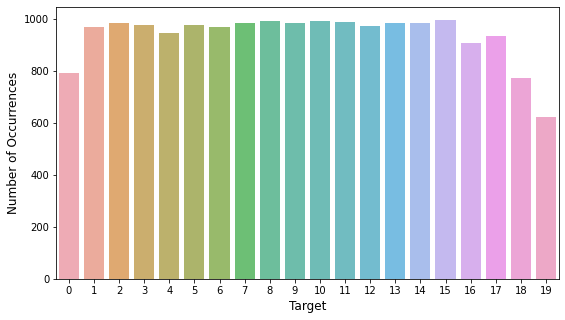

In [12]:
import seaborn as sns
count_cl = df['target_num'].value_counts()

plt.figure(figsize=(9,5))
sns.barplot(count_cl.index, count_cl.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target', fontsize=12);

# PRE-PROCESSING

Per il pre-processing abbiamo svolto le seguenti azioni:

- Conversione del testo in minuscolo
- Eliminazione indirizzi mail
- Eliminazione numeri
- Eliminazione caratteri di punteggiatura
- Rimozione parole composta da una e due lettere
- Sistemazione degli spazi che si sono creati con le precedenti operazioni

In [8]:
# Trasformazione in lower-case
df['text_processed'] = df['text'].map(lambda x: x.lower())

# Rimozione indirizzi email
df['text_processed'] = df['text_processed'].apply(lambda x: re.sub('\w+@\w+\.\w+?', '', x))

# Rimozione numeri
df['text_processed'] = df['text_processed'].apply(lambda x: re.sub('\d','', x))

# Rimozione della punteggiatura
df['text_processed']  = df['text_processed'].apply(lambda x: re.sub(r'[^\w\s]','', x))

# Rimozione parole composte
df['text_processed']  = df['text_processed'].astype(str).map(lambda x: re.sub(r'\b\w{1,2}\b', '', x))

# Rimozione spazi
df['text_processed'] = df['text_processed'].map(lambda x: re.sub(' +', ' ', x))

#rimozione spazi di inizio riga
df['text_processed'] = df['text_processed'].map(lambda x: x.lstrip()) 

#rimozione spazi di fine riga
df['text_processed'] = df['text_processed'].map(lambda x: x.rstrip()) 

# TOKENIZZAZIONE TESTO


In [9]:
df['text_processed'] = df['text_processed'].apply(nltk.tokenize.word_tokenize)

In [15]:
df.head()

,text,target,idx,target_num,text_processed
0,['>In article <Apr.7.01.56.56.1993.22824@athos...,soc.religion.christian,20487,15,"[article, aprutgersedu, chpcomn, matt, therefo..."
1,['I have come across what I consider to be an ...,soc.religion.christian,20488,15,"[have, come, across, what, consider, excellent..."
2,"['Hi...\n', '\n', ""I'm new to this group, and ...",soc.religion.christian,20362,15,"[hin, new, this, group, and, maybe, this, has,..."
3,"['Therefore, whoever humbles himself like this...",soc.religion.christian,20365,15,"[therefore, whoever, humbles, himself, like, t..."
4,['>In article <Mar.22.02.52.49.1993.330@athos....,soc.religion.christian,20361,15,"[article, marutgersedu, sugaedu, terrance, hea..."


# STOP-WORDS

Vengono eliminate le stopwords

In [10]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','one','would']) #aggiunta a mano di stop_words

def remove_stopwords(serie):
    return [word for word in serie if word not in stop_words]

# Rimozione stopwords
df['text_processed'] = df['text_processed'].apply(remove_stopwords)

In [17]:
df.head()

,text,target,idx,target_num,text_processed
0,['>In article <Apr.7.01.56.56.1993.22824@athos...,soc.religion.christian,20487,15,"[article, aprutgersedu, chpcomn, matt, therefo..."
1,['I have come across what I consider to be an ...,soc.religion.christian,20488,15,"[come, across, consider, excellent, tract, bit..."
2,"['Hi...\n', '\n', ""I'm new to this group, and ...",soc.religion.christian,20362,15,"[hin, new, group, maybe, covered, alreadyn, an..."
3,"['Therefore, whoever humbles himself like this...",soc.religion.christian,20365,15,"[therefore, whoever, humbles, like, child, gre..."
4,['>In article <Mar.22.02.52.49.1993.330@athos....,soc.religion.christian,20361,15,"[article, marutgersedu, sugaedu, terrance, hea..."


# LEMMATIZZAZIONE E STEMMATIZZAZIONE

Si procede alla lemmatization e allo stemming (utilizzando l'algoritmo di Porter) del testo, tenendo separate le due operazioni:

In [11]:
def lemmatization(serie):
    return [WordNetLemmatizer().lemmatize(str(word)) for word in serie]

df['token_lem'] = df['text_processed'].apply(lemmatization)

def stemming(serie):
    return [PorterStemmer().stem(str(word)) for word in serie]

df['token_stem'] = df['text_processed'].apply(stemming)

In [19]:
df.head()

,text,target,idx,target_num,text_processed,token_lem,token_stem
0,['>In article <Apr.7.01.56.56.1993.22824@athos...,soc.religion.christian,20487,15,"[article, aprutgersedu, chpcomn, matt, therefo...","[article, aprutgersedu, chpcomn, matt, therefo...","[articl, aprutgersedu, chpcomn, matt, therefor..."
1,['I have come across what I consider to be an ...,soc.religion.christian,20488,15,"[come, across, consider, excellent, tract, bit...","[come, across, consider, excellent, tract, bit...","[come, across, consid, excel, tract, bit, leng..."
2,"['Hi...\n', '\n', ""I'm new to this group, and ...",soc.religion.christian,20362,15,"[hin, new, group, maybe, covered, alreadyn, an...","[hin, new, group, maybe, covered, alreadyn, an...","[hin, new, group, mayb, cover, alreadyn, anybo..."
3,"['Therefore, whoever humbles himself like this...",soc.religion.christian,20365,15,"[therefore, whoever, humbles, like, child, gre...","[therefore, whoever, humbles, like, child, gre...","[therefor, whoever, humbl, like, child, greate..."
4,['>In article <Mar.22.02.52.49.1993.330@athos....,soc.religion.christian,20361,15,"[article, marutgersedu, sugaedu, terrance, hea...","[article, marutgersedu, sugaedu, terrance, hea...","[articl, marutgersedu, sugaedu, terranc, heath..."


Per avere un quadro più completo viene presa in esame anche la rappresentazione bigram, sia per i token stem e lem:

In [12]:
def bigram(token):
    bi = []
    for i in range(1,len(token)):
        bi.append(token[i-1] + ' ' + token[i])
    return(bi)

df['bigram_stem'] = df['token_stem'].apply(bigram)
df['bigram_lem'] = df['token_lem'].apply(bigram)

In [21]:
df.head()

,text,target,idx,target_num,text_processed,token_lem,token_stem,bigram_stem,bigram_lem
0,['>In article <Apr.7.01.56.56.1993.22824@athos...,soc.religion.christian,20487,15,"[article, aprutgersedu, chpcomn, matt, therefo...","[article, aprutgersedu, chpcomn, matt, therefo...","[articl, aprutgersedu, chpcomn, matt, therefor...","[articl aprutgersedu, aprutgersedu chpcomn, ch...","[article aprutgersedu, aprutgersedu chpcomn, c..."
1,['I have come across what I consider to be an ...,soc.religion.christian,20488,15,"[come, across, consider, excellent, tract, bit...","[come, across, consider, excellent, tract, bit...","[come, across, consid, excel, tract, bit, leng...","[come across, across consid, consid excel, exc...","[come across, across consider, consider excell..."
2,"['Hi...\n', '\n', ""I'm new to this group, and ...",soc.religion.christian,20362,15,"[hin, new, group, maybe, covered, alreadyn, an...","[hin, new, group, maybe, covered, alreadyn, an...","[hin, new, group, mayb, cover, alreadyn, anybo...","[hin new, new group, group mayb, mayb cover, c...","[hin new, new group, group maybe, maybe covere..."
3,"['Therefore, whoever humbles himself like this...",soc.religion.christian,20365,15,"[therefore, whoever, humbles, like, child, gre...","[therefore, whoever, humbles, like, child, gre...","[therefor, whoever, humbl, like, child, greate...","[therefor whoever, whoever humbl, humbl like, ...","[therefore whoever, whoever humbles, humbles l..."
4,['>In article <Mar.22.02.52.49.1993.330@athos....,soc.religion.christian,20361,15,"[article, marutgersedu, sugaedu, terrance, hea...","[article, marutgersedu, sugaedu, terrance, hea...","[articl, marutgersedu, sugaedu, terranc, heath...","[articl marutgersedu, marutgersedu sugaedu, su...","[article marutgersedu, marutgersedu sugaedu, s..."


# CLASSIFICAZIONE

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df,df['target'],test_size = 0.2, stratify=df['target'])

# MATRICI

Partendo dai token lem e stem e dalle matrici unigram e bigram si procede a calcolare, per ogni combinazione:
- Pesi TF
- Pesi TF-IDF
- Pesi Binari

Inoltre si utilizza un token_pattern in modo da prendere in considerazione solamente parole di lunghezza > 2

In [14]:
# Funzione per utilizzare le tokenizzazioni già svolte
def identity_tokenizer(text):
    return text

In [15]:
# Vettorizzatore per pesi TF-IDF
tfidf = TfidfVectorizer(
    analyzer='word',
    min_df=10,
    lowercase=True,
    tokenizer=identity_tokenizer,
    preprocessor=identity_tokenizer,
    token_pattern='[a-zA-Z0-9]{3,}')

# Vettorizzatore per pesi TF
count = CountVectorizer(
    analyzer='word',
    min_df=10,
    lowercase=True,
    tokenizer=identity_tokenizer,
    preprocessor=identity_tokenizer,
    token_pattern='[a-zA-Z0-9]{3,}') 

# Vettorizzatore per pesi binari
binary = CountVectorizer(
    analyzer='word',
    min_df=10,
    binary=True,
    tokenizer=identity_tokenizer,
    preprocessor=identity_tokenizer,
    token_pattern='[a-zA-Z0-9]{3,}') 

# Funzione che crea la vettorizzazione partendo dalla matrice train e la applica su quella test corrispondente
def create_matrix(token_train,token_test,vectorizer):
    ls = []
    for vett in vectorizer:
        for i in zip(token_train,token_test):
            train = vett.fit_transform(i[0])
            test = vett.transform(i[1])
            ls.append((train,test))
    return ls

matrix = create_matrix([x_train['token_stem'],x_train['bigram_stem'],x_train['token_lem'],x_train['bigram_lem']], [x_test['token_stem'],x_test['bigram_stem'],x_test['token_lem'],x_test['bigram_lem']], [tfidf,count,binary])

Otteniamo 24 matrici, 12 di train e 12 di test:

- Unigram - tf-idf - stem
- Unigram - tf-idf - lem
- Unigram - tf - stem
- Unigram - tf - lem
- Unigram - binary - stem
- Unigram - binary - lem

- Bigram - tf-idf - stem
- Bigram - tf-idf - lem
- Bigram - tf - stem
- Bigram - tf - lem
- Bigram - binary - stem
- Bigram - binary - lem


# FEATURE SELECTION





Utilizzando il test del chi-quadro si ottiene una feature selection si tengono solo le prime 5000 features (per ogni matrice) ordinate in ordine decrescente in base al valore del test. 
<br>
L'operazione di feature selection viene giustificata perchè:
- Si riduce il rischio di overfitting
- Eliminazione degli features irrilevanti e quindi potenzialmente migliora le performance dei modelli
- Permette di addestrare modelli utilizzando minor sforzo computazionale

In [16]:
def feature_selection(ls_mat):
    matrix_train=ls_mat[0]
    matrix_test=ls_mat[1]
    kb=SelectKBest(chi2, k=5000)
    kb.fit_transform(matrix_train, y_train)
    train=pd.DataFrame((kb.fit_transform(matrix_train, y_train)).toarray())
    test=pd.DataFrame((kb.transform(matrix_test)).toarray())
    return((train,test))

Per comodità le matrici vengono salvate in un dizionario, la chiave corrisponde al nome della matrice e il valore ad una tupla contente la matrice di train e quella di test corrispondenti alla chiave:

In [17]:
names = ['unigram_tfidf_stem','bigram_tfidf_stem','unigram_tfidf_lem','bigram_tfidf_lem','unigram_count_stem','bigram_count_stem','unigram_count_lem','bigram_count_lem','unigram_binary_stem','bigram_binary_stem','unigram_binary_lem','bigram_binary_lem']

dict_matrix = {}
for i in range(len(matrix)):
    dict_matrix[names[i]] = feature_selection(matrix[i])

# MODELLISTICA

I classificatori scelti, considerando la letteratura e lo sforzo computazionale, sono:

- Naive Bayes
- Random Forest
- Regressione logistica

Ogni modello viene addestrato con diversi iper-parametri sul dataset di training e successivamente viene testato sui dati di test:

In [31]:
dict_classificators=  {'Naive Bayes':MultinomialNB(),'Random Forest':RandomForestClassifier(max_features='log2'),'Reg Log':LogisticRegression(multi_class='multinomial', n_jobs=-1)}

In [ ]:
diz_results = {}
for classificator in dict_classificators:
  for matrix in dict_matrix:
    type_matrix = matrix.split('_')[0]
    weight = matrix.split('_')[1]
    token = matrix.split('_')[2]
    parameters = {'Naive Bayes':{'alpha':[0.1,0.5,1]},'Random Forest':{'criterion':['gini','entropy'],'n_estimators':[100,200], 'max_depth':[5,10,20]},'Reg Log':{'solver':['lbfgs','saga'],'max_iter':[5,10,15]} }
    grid_obj = GridSearchCV(dict_classificators[classificator], parameters[classificator], cv=5, n_jobs=-1).fit(dict_matrix[matrix][0], y_train)
    accuracy_train = grid_obj.best_score_
    clf = grid_obj.best_estimator_
    clf.fit(dict_matrix[matrix][0], y_train)
    predictions = clf.predict(dict_matrix[matrix][1])
    accuracy_test = accuracy_score(y_test, predictions)
    diz_results[str(matrix)+';'+str(classificator)]={'tipo_matrice':type_matrix,'peso':weight, 'token':token, 'classificatore':classificator,'accuracy_train_cv':accuracy_train, 'accuracy_test':accuracy_test}

ris = pd.DataFrame.from_dict(diz_results, orient='index').reset_index()

# Si esportano i risultati in un file csv
ris.to_csv('Risultati.csv')

KeyboardInterrupt: ignored

In [32]:
risultati = pd.read_excel('/content/drive/My Drive/RisultatiFinale.xlsx')
risultati.head()

,index,tipo_matrice,peso,token,classificatore,accuracy_train_cv,accuracy_test
0,unigram_tfidf_stem_Naive Bayes,unigram,tfidf,stem,Naive Bayes,0.797267,0.776860
1,bigram_tfidf_stem_Naive Bayes,bigram,tfidf,stem,Naive Bayes,0.603867,0.565449
2,unigram_tfidf_lem_Naive Bayes,unigram,tfidf,lem,Naive Bayes,0.795800,0.781925
3,bigram_tfidf_lem_Naive Bayes,bigram,tfidf,lem,Naive Bayes,0.593667,0.556918
4,unigram_count_stem_Naive Bayes,unigram,count,stem,Naive Bayes,0.770533,0.760064


Il tipo di rappresentazione mediamente più performante è decisamente quella unigram

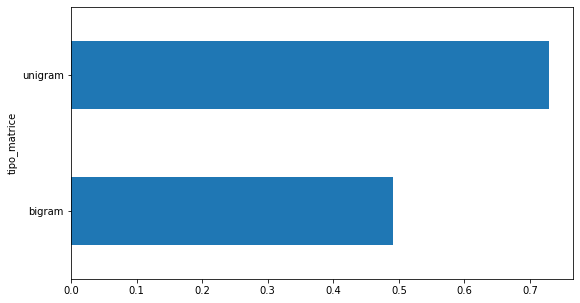

In [33]:
groups = risultati.groupby('tipo_matrice')['accuracy_test'].mean()
plt.figure(figsize=(9,5))
ax = groups.plot.barh(x='accuracy_test', y='tipo_matrice')

Non sembra esserci mediamente grossa distinzione tra i tre pesi, il più performante risulta quello tfidf

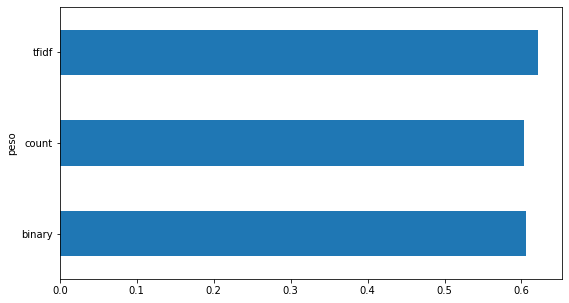

In [34]:
groups= risultati.groupby('peso')['accuracy_test'].mean()
plt.figure(figsize=(9,5))
ax = groups.plot.barh(x='accuracy_test', y='peso')

Mediamente l'operazione di stemming aumenta l'accuracy di 0.6 punti percentuali

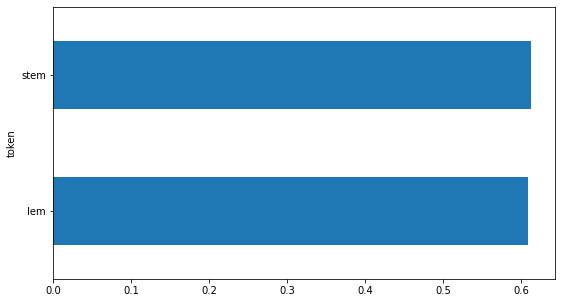

In [35]:
groups=risultati.groupby('token')['accuracy_test'].mean()
plt.figure(figsize=(9,5))
ax = groups.plot.barh(x='accuracy_test', y='token')

Il classificatore mediamente più performante è il MultiNomial NB, segue la regressione logisticsa e con notevole distacco la random forest

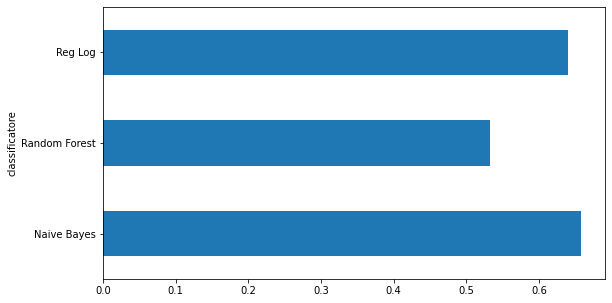

In [36]:
groups=risultati.groupby('classificatore')['accuracy_test'].mean()
plt.figure(figsize=(9,5))
ax = groups.plot.barh(x='accuracy_test', y='classificatore')

Il multinomial naive bayes e la regressione logistica ottengono un'accuracy superiore al 75% utilizzando le due matrici unigram con pesi tfidf:

In [37]:
risultati.sort_values('accuracy_test', ascending=False)

,index,tipo_matrice,peso,token,classificatore,accuracy_train_cv,accuracy_test
2,unigram_tfidf_lem_Naive Bayes,unigram,tfidf,lem,Naive Bayes,0.795800,0.781925
0,unigram_tfidf_stem_Naive Bayes,unigram,tfidf,stem,Naive Bayes,0.797267,0.776860
8,unigram_binary_stem_Naive Bayes,unigram,binary,stem,Naive Bayes,0.776667,0.772594
10,unigram_binary_lem_Naive Bayes,unigram,binary,lem,Naive Bayes,0.775400,0.768595
26,"unigram_tfidf_lem,Reg Log",unigram,tfidf,lem,Reg Log,0.776067,0.766729
24,unigram_tfidf_stem_Reg Log,unigram,tfidf,stem,Reg Log,0.778733,0.762730
6,unigram_count_lem_Naive Bayes,unigram,count,lem,Naive Bayes,0.771333,0.762463
4,unigram_count_stem_Naive Bayes,unigram,count,stem,Naive Bayes,0.770533,0.760064
30,unigram_count_lem_Reg Log,unigram,count,lem,Reg Log,0.741267,0.738470
28,unigram_count_stem_Reg Log,unigram,count,stem,Reg Log,0.736800,0.735004


# TOPIC MODELLING

# LDA Unigram - tf-idf - lem 

In [27]:
data_token_lem_tfidf = tfidf.fit_transform(df.token_lem)

In [28]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_lem_tfidf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_lem_tfidf))

Best Model Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -278889.9197941363
Model Perplexity:  14888.229725431718


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_lem_tfidf, tfidf, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  56.635036
4       51.163364 -159.968018       2        1  23.911377
0      -73.144554   21.523815       3        1  10.520408
3      -66.410133 -110.606438       4        1   5.257166
2       54.417324   12.443444       5        1   3.676013, topic_info=           Term        Freq       Total Category  logprob  loglift
4711      drive  113.000000  113.000000  Default  30.0000  30.0000
6272       game  122.000000  122.000000  Default  29.0000  29.0000
2273       card   90.000000   90.000000  Default  28.0000  28.0000
15239   thanksn  114.000000  114.000000  Default  27.0000  27.0000
6470        god  145.000000  145.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
6405        gif    5.834123   15.952834   Topic5  -6.6607   2.2974
11829   program    8.021507  108.868786   Topic5  -6.3423   0.6953
7850   internet    6.720377   81.543878   Topic5  -6.5193   0.8073
15238    thanks    6.731625  114.742312   Topic5  -6.5176   0.4675
16183       usa    6.134735   36.932056   Topic5  -6.6104   1.5082

[364 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0          1  0.390201    ___
0          2  0.053209    ___
0          3  0.124155    ___
0          5  0.425674    ___
1          1  0.449287   ____
...      ...       ...    ...
17089      2  0.171386   year
17089      3  0.281074   year
17089      4  0.006855   year
17094      2  0.097596  yeast
17094      5  0.780770  yeast

[723 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

# LDA Unigram - tf-idf - stem

In [ ]:
data_token_stem_tfidf = tfidf.fit_transform(df.token_stem)

In [ ]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_stem_tfidf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_stem_tfidf))

Best Model Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -267261.8964492552
Model Perplexity:  12049.83668554879


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_stem_tfidf, tfidf, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  34.538469
0       51.163364 -159.968018       2        1  21.334180
2      -73.144554   21.523815       3        1  19.505976
3      -66.410133 -110.606438       4        1  15.665687
1       54.417324   12.443444       5        1   8.955688, topic_info=            Term        Freq       Total Category  logprob  loglift
5351         god  150.000000  150.000000  Default  30.0000  30.0000
2266   christian   96.000000   96.000000  Default  29.0000  29.0000
5174        game  128.000000  128.000000  Default  28.0000  28.0000
14332     window  157.000000  157.000000  Default  27.0000  27.0000
12741       team   83.000000   83.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
9414       peopl   14.381924  216.378563   Topic5  -6.6370  -0.2982
542         andn   13.761650  142.222889   Topic5  -6.6811   0.0774
814       articl   13.492056  163.665724   Topic5  -6.7009  -0.0828
7816         may   13.176805  134.175113   Topic5  -6.7245   0.0922
12608     system   13.137682  154.494836   Topic5  -6.7275  -0.0518

[375 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          1  0.509863       ___
0          2  0.203945       ___
0          3  0.016995       ___
0          4  0.033991       ___
0          5  0.220940       ___
...      ...       ...       ...
14582      3  0.193310      year
14582      4  0.093322      year
14582      5  0.059993      year
14587      5  0.930543     yeast
14663      5  0.960659  zoologyn

[802 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

# LDA Bigram - tf-idf - stem


In [ ]:
data_bigram_stem_tfidf = tfidf.fit_transform(df.bigram_stem)

In [ ]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_stem_tfidf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_stem_tfidf))

Best Model Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -159623.3422798693
Model Perplexity:  31290.27407702234


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_stem_tfidf, tfidf, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  23.319826
1       51.163364 -159.968018       2        1  20.416278
0      -73.144554   21.523815       3        1  19.292970
3      -66.410133 -110.606438       4        1  18.999446
2       54.417324   12.443444       5        1  17.971480, topic_info=                 Term       Freq      Total Category  logprob  loglift
11197  thank advancen  93.000000  93.000000  Default  30.0000  30.0000
4508      gordon bank  18.000000  18.000000  Default  29.0000  29.0000
1883     clipper chip  25.000000  25.000000  Default  28.0000  28.0000
10091   serial number  18.000000  18.000000  Default  27.0000  27.0000
0             ___ ___  30.000000  30.000000  Default  26.0000  26.0000
...               ...        ...        ...      ...      ...      ...
8436      pleas email  13.028028  59.588799   Topic5  -6.6798   0.1960
8459    pleas respond  11.500834  23.155860   Topic5  -6.8045   1.0166
5998        last year  12.080742  54.395313   Topic5  -6.7553   0.2117
3131    email address  11.445642  29.693933   Topic5  -6.8093   0.7631
2932        dont want  11.402963  42.670910   Topic5  -6.8130   0.3967

[303 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
0          1  0.451921        ___ ___
0          4  0.548761        ___ ___
1          1  0.908265       ___ ____
12         1  0.974054      ____ ____
16         1  0.186914    _____ _____
...      ...       ...            ...
13332      1  0.493824       youv got
13332      3  0.148147       youv got
13332      4  0.098765       youv got
13332      5  0.246912       youv got
13340      1  0.962893  zoologyn kipl

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 4, 3])

# LDA Bigram - tf-idf - lem

In [ ]:
data_bigram_lem_tfidf = tfidf.fit_transform(df.bigram_lem)

In [ ]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_lem_tfidf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_lem_tfidf))

Best Model Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -148117.6051227355
Model Perplexity:  26613.104828399006


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_lem_tfidf, tfidf, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  24.391288
1       51.163364 -159.968018       2        1  22.012990
4      -73.144554   21.523815       3        1  18.167558
0      -66.410133 -110.606438       4        1  18.005037
3       54.417324   12.443444       5        1  17.423126, topic_info=                 Term       Freq       Total Category  logprob  loglift
0             ___ ___  32.000000   32.000000  Default  30.0000  30.0000
9249   someone please  28.000000   28.000000  Default  29.0000  29.0000
2004    could someone  31.000000   31.000000  Default  28.0000  28.0000
10975      video card  29.000000   29.000000  Default  27.0000  27.0000
3993      gordon bank  19.000000   19.000000  Default  26.0000  26.0000
...               ...        ...         ...      ...      ...      ...
2548        dont know  14.105145  124.224035   Topic5  -6.5082  -0.4282
7535     please email  11.550268   63.424716   Topic5  -6.7080   0.0442
2593       dont think  11.575544   79.373681   Topic5  -6.7058  -0.1779
1677     clipper chip  10.680726   27.724329   Topic5  -6.7863   0.7935
11687        year ago  10.560069   64.991800   Topic5  -6.7977  -0.0698

[293 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
0          3  0.965678           ___ ___
1          3  0.886021          ___ ____
2          3  0.950217         ___ _____
11         3  0.967841          ____ ___
12         2  0.086774         ____ ____
...      ...       ...               ...
11714      2  0.135917          year old
11714      3  0.081550          year old
11714      4  0.163100          year old
11714      5  0.190284          year old
11836      1  0.958581  zoologyn kipling

[498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

# LDA Unigram - tf - lem


In [ ]:
data_token_lem_tf = count.fit_transform(df.token_lem)

In [ ]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_lem_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [ ]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_lem_tf))

Best Model Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -3524919.8851657817
Model Perplexity:  3834.7391448626267


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_lem_tf, count, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  26.679354
2       51.163364 -159.968018       2        1  26.502750
3      -73.144554   21.523815       3        1  23.018418
1      -66.410133 -110.606438       4        1  14.084024
0       54.417324   12.443444       5        1   9.715454, topic_info=                                   Term         Freq  ...  logprob  loglift
9299   maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxn  3254.000000  ...  30.0000  30.0000
6272                               game  2463.000000  ...  29.0000  29.0000
6470                                god  4156.000000  ...  28.0000  28.0000
5784                               file  3368.000000  ...  27.0000  27.0000
15075                              team  1691.000000  ...  26.0000  26.0000
...                                 ...          ...  ...      ...      ...
8404                               know   632.328718  ...  -5.7100  -0.1658
15913                               two   517.490672  ...  -5.9104   0.3298
16995                           writesn   491.197239  ...  -5.9625   0.3404
10098                               new   474.342524  ...  -5.9975   0.0733
5301                               even   469.561292  ...  -6.0076   0.0451

[448 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
283        1  0.997495       adl
540        1  0.251486      also
540        2  0.363183      also
540        3  0.147146      also
540        4  0.165372      also
...      ...       ...       ...
17089      3  0.256832      year
17089      4  0.246340      year
17089      5  0.301204      year
17094      4  0.992734     yeast
17171      4  0.991689  zoologyn

[977 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

# LDA Unigram - tf - stem

In [29]:
data_token_stem_tf = count.fit_transform(df.token_stem)

In [30]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_stem_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [31]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_stem_tf))

Best Model Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -3475926.180923336
Model Perplexity:  3102.246173168067


In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_stem_tf, count, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  24.807491
1       51.163364 -159.968018       2        1  20.866413
3      -73.144554   21.523815       3        1  20.465433
0      -66.410133 -110.606438       4        1  19.956711
2       54.417324   12.443444       5        1  13.903951, topic_info=                                   Term         Freq  ...  logprob  loglift
5351                                god  4088.000000  ...  30.0000  30.0000
7809   maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxn  3317.000000  ...  29.0000  29.0000
4759                               file  3500.000000  ...  28.0000  28.0000
14332                            window  3003.000000  ...  27.0000  27.0000
5174                               game  2478.000000  ...  26.0000  26.0000
...                                 ...          ...  ...      ...      ...
14160                               way   613.755779  ...  -6.1148  -0.0329
13148                               ton   607.008646  ...  -6.1259  -0.2786
8867                                ofn   587.700578  ...  -6.1582  -0.2134
12955                             thing   576.466463  ...  -6.1775  -0.0655
14105                              want   577.298937  ...  -6.1761  -0.1657

[445 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
215        3  0.998585      adl
337        1  0.013947      air
337        2  0.003985      air
337        3  0.157399      air
337        4  0.103605      air
...      ...       ...      ...
14582      3  0.239759     year
14582      4  0.399380     year
14582      5  0.184951     year
14654      3  0.994711  zionism
14656      3  0.992369  zionist

[1040 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

# LDA Bigram - tf - lem

In [33]:
data_bigram_lem_tf = count.fit_transform(df.bigram_lem)

In [34]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_lem_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [35]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_lem_tf))

Best Model Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -589830.9925353962
Model Perplexity:  7222.674887350031


In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_lem_tf, count, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  21.300795
3       51.163364 -159.968018       2        1  20.364087
2      -73.144554   21.523815       3        1  20.245677
0      -66.410133 -110.606438       4        1  20.159638
1       54.417324   12.443444       5        1  17.929804, topic_info=                                                   Term  ...  loglift
6066  maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxn maxaxaxaxaxax...  ...  30.0000
9938                                    thanks advancen  ...  29.0000
1677                                       clipper chip  ...  28.0000
5365                                    law enforcement  ...  27.0000
446                                       anonymous ftp  ...  26.0000
...                                                 ...  ...      ...
5342                                          last year  ...   0.2623
9277                                     something like  ...   0.2211
5324                                         last night  ...   0.6720
5464                                           let know  ...   0.7348
9333                                         sound like  ...   0.2734

[300 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
0          3  0.599537        ___ ___
0          4  0.395695        ___ ___
100        2  0.989317  activity netn
123        2  0.992368  adam laskaedu
189        2  0.989317    alink ksand
...      ...       ...            ...
11804      5  0.839433   young people
11828      1  0.174099      youve got
11828      2  0.055395      youve got
11828      3  0.538123      youve got
11828      5  0.221580      youve got

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

# LDA Bigram - tf - stem

In [37]:
data_bigram_stem_tf = count.fit_transform(df.bigram_stem)

In [38]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_stem_tf)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [39]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_stem_tf))

Best Model Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -664501.1511713697
Model Perplexity:  8726.14424214716


In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_stem_tf, count, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  24.883278
2       51.163364 -159.968018       2        1  24.429415
4      -73.144554   21.523815       3        1  18.709001
3      -66.410133 -110.606438       4        1  17.444705
0       54.417324   12.443444       5        1  14.533600, topic_info=                                                    Term  ...  loglift
6813   maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxn maxaxaxaxaxax...  ...  30.0000
567                                           anyon know  ...  29.0000
7586                                            new york  ...  28.0000
11197                                     thank advancen  ...  27.0000
6022                                          law enforc  ...  26.0000
...                                                  ...  ...      ...
8436                                         pleas email  ...   0.6204
5509                                            ive seen  ...   0.3163
10441                                        someth like  ...   0.0781
2065                                       comput scienc  ...   0.7781
6131                                            let know  ...   0.6034

[307 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
0          1  0.187238       ___ ___
0          4  0.809351       ___ ___
12         4  0.975923     ____ ____
93         4  0.975959  accuraci ofn
107        1  0.992502    activ netn
...      ...       ...           ...
13199      4  0.258022      year ago
13199      5  0.107509      year ago
13309      1  0.032521   young peopl
13309      2  0.959369   young peopl
13341      5  0.967188  zoologyn svr

[490 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

# LDA Unigram - binary - lem

In [18]:
data_token_lem_binary = binary.fit_transform(df.token_lem)

In [19]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_lem_binary)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [20]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_lem_binary))

Best Model Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -2617665.2839399017
Model Perplexity:  4840.778329049644


In [21]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_lem_binary, binary, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  27.362001
1       51.163364 -159.968018       2        1  25.944725
4      -73.144554   21.523815       3        1  24.131063
0      -66.410133 -110.606438       4        1  11.546164
3       54.417324   12.443444       5        1  11.016048, topic_info=         Term         Freq        Total Category  logprob  loglift
6272     game  1042.000000  1042.000000  Default  30.0000  30.0000
2266      car   908.000000   908.000000  Default  29.0000  29.0000
15075    team   730.000000   730.000000  Default  28.0000  28.0000
17089    year  2572.000000  2572.000000  Default  27.0000  27.0000
16814  window  1217.000000  1217.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
13264     say   367.442530  3115.736572   Topic5  -6.0612   0.0682
1624   better   341.242241  1658.205998   Topic5  -6.1352   0.6249
9859     much   356.549380  2805.253225   Topic5  -6.0913   0.1430
9110     make   357.714376  3489.030368   Topic5  -6.0881  -0.0718
6477    going   340.198591  1860.893916   Topic5  -6.1383   0.5065

[463 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
146        3  0.965487  accidental
243        2  0.990449     adapter
316        2  0.986359    advancen
316        4  0.012355    advancen
381        1  0.844222      agency
...      ...       ...         ...
17089      2  0.112744        year
17089      3  0.169116        year
17089      4  0.192831        year
17089      5  0.268642        year
17165      1  0.989914     zionist

[1016 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

# LDA Unigram - binary - stem

In [22]:
data_token_stem_binary = binary.fit_transform(df.token_stem)

In [23]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_token_stem_binary) 

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [24]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_token_stem_binary))

Best Model Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -2511299.117059676
Model Perplexity:  3857.18994823374


In [25]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_token_stem_binary, binary, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  25.195517
3       51.163364 -159.968018       2        1  22.924988
0      -73.144554   21.523815       3        1  22.829119
4      -66.410133 -110.606438       4        1  16.720852
2       54.417324   12.443444       5        1  12.329524, topic_info=            Term         Freq        Total Category  logprob  loglift
5351         god  1199.000000  1199.000000  Default  30.0000  30.0000
14332     window  1219.000000  1219.000000  Default  29.0000  29.0000
4143       email  1929.000000  1929.000000  Default  28.0000  28.0000
12888    thanksn  1025.000000  1025.000000  Default  27.0000  27.0000
2266   christian   864.000000   864.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
14160        way   313.662520  3101.373396   Topic5  -6.3222  -0.1981
438         also   310.900853  3710.105240   Topic5  -6.3310  -0.3862
7154        last   292.115086  1908.260419   Topic5  -6.3934   0.2164
4809       first   290.441220  2423.130368   Topic5  -6.3991  -0.0282
14424       work   281.942256  3123.411687   Topic5  -6.4288  -0.3118

[466 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
114        1  0.026442    accept
114        2  0.140255    accept
114        3  0.575965    accept
114        4  0.136806    accept
114        5  0.121861    accept
...      ...       ...       ...
14608      1  0.150061      york
14608      2  0.092765      york
14608      4  0.021827      york
14608      5  0.731208      york
14663      1  0.990653  zoologyn

[1071 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

# LDA Bigram - binary - lem

In [26]:
data_bigram_lem_binary = binary.fit_transform(df.bigram_lem)

In [27]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_lem_binary) 

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [28]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_lem_binary))

Best Model Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -536707.8851409127
Model Perplexity:  8382.29157902907


In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_lem_binary, binary, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  30.042197
2       51.163364 -159.968018       2        1  20.149679
0      -73.144554   21.523815       3        1  19.268366
3      -66.410133 -110.606438       4        1  15.337383
4       54.417324   12.443444       5        1  15.202375, topic_info=                  Term        Freq       Total Category  logprob  loglift
516        anyone know  554.000000  554.000000  Default  30.0000  30.0000
8948     serdar argicn  121.000000  121.000000  Default  29.0000  29.0000
5700     longer exists  118.000000  118.000000  Default  28.0000  28.0000
11151       way escape  117.000000  117.000000  Default  27.0000  27.0000
630      argicn closed  116.000000  116.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
11629  writesn article   78.977032  440.567234   Topic5  -6.1007   0.1648
3041         every day   53.786254  123.125760   Topic5  -6.4848   1.0555
9333        sound like   55.740413  291.103293   Topic5  -6.4491   0.2307
5342         last year   55.294337  342.110189   Topic5  -6.4572   0.0613
2583          dont see   47.177979  219.993778   Topic5  -6.6159   0.3440

[310 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
1          3  0.982966       ___ ____
12         3  0.968129      ____ ____
16         2  0.919476    _____ _____
16         3  0.061298    _____ _____
63         3  0.965381   abpsoft mehl
...      ...       ...            ...
11714      2  0.158291       year old
11714      3  0.120083       year old
11714      4  0.087333       year old
11714      5  0.376623       year old
11760      5  0.973615  york replaced

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5])

# LDA Bigram - binary - stem

In [30]:
data_bigram_stem_binary = binary.fit_transform(df.bigram_stem)

In [31]:
# Parametri di ricerca
search_params = {'n_components': [5,10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Inizializzazione Modello
lda = LatentDirichletAllocation()

# Inizializzazione GridSearchCV
model = GridSearchCV(lda, param_grid=search_params)

# Grid Search
model.fit(data_bigram_stem_binary) 

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [32]:
# Stimato il Miglior modello 
best_lda_model = model.best_estimator_

# Parametri del modello
print("Best Model Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplessità
print("Model Perplexity: ", best_lda_model.perplexity(data_bigram_stem_binary))

Best Model Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -605650.3532911433
Model Perplexity:  9598.229771887038


In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(best_lda_model, data_bigram_stem_binary, binary, mds='tsne')
vis

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  24.853322
3       51.163364 -159.968018       2        1  24.393665
1      -73.144554   21.523815       3        1  21.404238
4      -66.410133 -110.606438       4        1  14.938416
2       54.417324   12.443444       5        1  14.410359, topic_info=                 Term        Freq       Total Category  logprob  loglift
11197  thank advancen  357.000000  357.000000  Default  30.0000  30.0000
8436      pleas email  231.000000  231.000000  Default  29.0000  29.0000
567        anyon know  553.000000  553.000000  Default  28.0000  28.0000
10087   serdar argicn  120.000000  120.000000  Default  27.0000  27.0000
6411     longer exist  118.000000  118.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
567        anyon know  104.627759  553.720239   Topic5  -5.8835   0.2710
6444        look like   71.762829  435.758988   Topic5  -6.2606   0.1335
13002       work fine   56.172259  145.522397   Topic5  -6.5055   0.9853
5509         ive seen   53.412792  318.928154   Topic5  -6.5559   0.1503
2924       dont think   53.381581  603.109261   Topic5  -6.5565  -0.4874

[311 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
2          2  0.985253      ___ _____
93         5  0.988513   accuraci ofn
107        3  0.993802     activ netn
134        5  0.993040  adam laskaedu
211        3  0.993802    alink ksand
...      ...       ...            ...
13199      2  0.212643       year ago
13199      3  0.212643       year ago
13199      4  0.130485       year ago
13199      5  0.043495       year ago
13340      5  0.980908  zoologyn kipl

[497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])